In [2]:
import warnings
warnings.filterwarnings(action='ignore') 

import datetime
import pandas as pd
import numpy as np
import csv
import folium
from folium.plugins import HeatMap 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans    ##  K-means 임포트
from sklearn.metrics import silhouette_score
import scipy as sp
from scipy.cluster.hierarchy import dendrogram, linkage
import statsmodels.formula.api as smf
from dateutil.relativedelta import relativedelta
# import setuptools.dist
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
plt.rc('font',family='D2CodingLigature Nerd Font')
# plt.rcParams['axes.unicode_minus']=False  # '- 표시

## 기본 네크워크 그래프_001

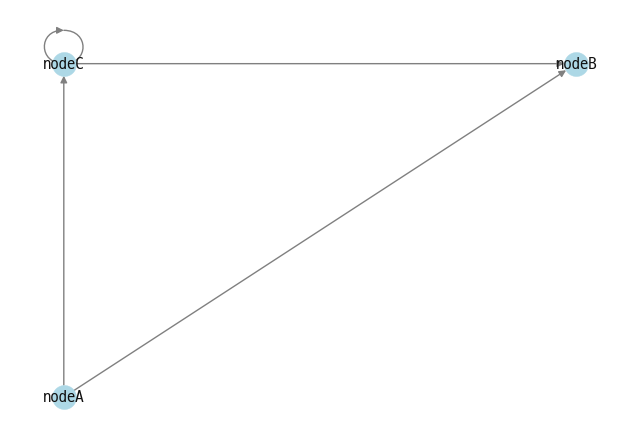

In [ ]:
# 그래프 객체생성
# G = nx.Graph()    # 무방향
G = nx.DiGraph()    # 방향

# 노드 설정
G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")

# 엣지 설정
G.add_edge("nodeA","nodeB")
G.add_edge("nodeA","nodeC")
G.add_edge("nodeC","nodeB")
G.add_edge("nodeC","nodeC")

# 좌표 설정
pos={}
pos["nodeA"]=(0,0)
pos["nodeB"]=(1,1)
pos["nodeC"]=(0,1)

# 그리기
nx.draw_networkx(G,pos, with_labels=True, node_color='lightblue', edge_color='gray', font_family='D2CodingLigature Nerd Font')

# 표시
plt.grid(False)
plt.axis('off')
plt.show()

## 기본 네크워크 그래프_002

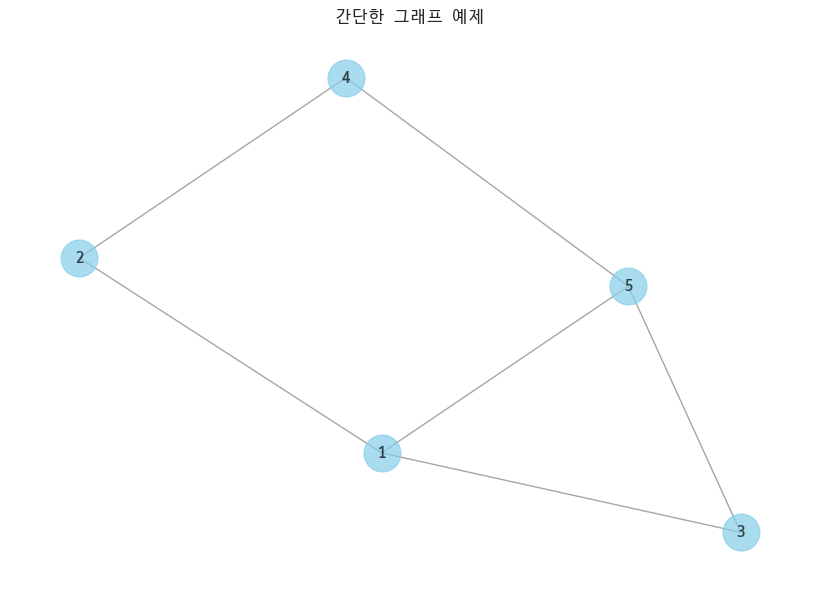

최단 경로 : [2, 1, 3]


In [27]:
# 그래프 생성
G = nx.Graph()
# G = nx.DiGraph()

# 노드 추가
G.add_nodes_from([1, 2, 3, 4, 5])

# 엣지 추가
G.add_edges_from([(1,2), (1,3), (2,4), (3,5), (4,5), (1,5)])

# 그래프 시각화
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_family='D2CodingLigature Nerd Font', font_weight='bold', node_size=700,
        font_color='black', font_size=12, node_color='skyblue', edge_color='gray', linewidths=1, alpha=0.7
        )
plt.title('간단한 그래프 예제')
plt.show()

# 최단 경로 찾기
start_node = 2
end_node = 3
shortest_path = nx.shortest_path(G, source=start_node, target=end_node)
print(f"최단 경로 : {shortest_path}")

## 기본 네크워크 그래프_003

In [41]:
G = nx.DiGraph()

# 노드 및 엣지 추가(노드를 자동으로 엣지에서 찾아서 분석)
edges = [(1, 2), (1, 3), (2, 1), (2, 3), (3, 4), (4, 5), (5, 3), (5, 1),(6, 1), (7, 3),(8, 2),(3, 6), (2, 7)]
G.add_edges_from(edges)

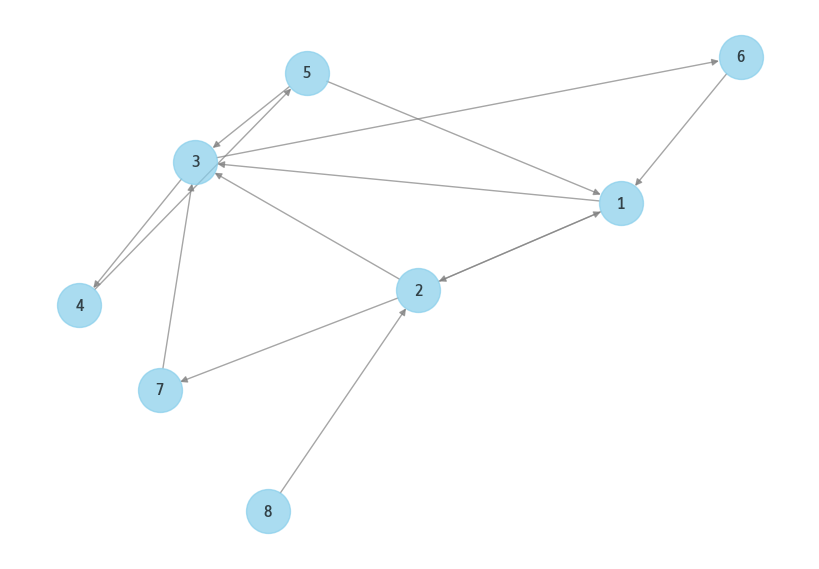

{1: 0.20668744189205857, 2: 0.12252955320022131, 3: 0.23804465519840734, 4: 0.11991994079701919, 5: 0.12068142414859735, 6: 0.11991994079701919, 7: 0.053467043966676966, 8: 0.018750000000000003}
가장 중요한 역할을 하는 노드: 3


In [42]:
# 그래프 시각화
pos = nx.spring_layout(G)
# pos = nx.circular_layout(G)

nx.draw(G, pos, with_labels=True, font_family='D2CodingLigature Nerd Font', font_weight='bold', node_size=1000,
        font_color='black', font_size=12, node_color='skyblue', edge_color='gray', linewidths=1, alpha=0.7
        )
plt.show()

# 페이지랭크 알고리즘을 사용하여 중요도 측정
pagerank_values = nx.pagerank(G)
print(pagerank_values)

# 중요도가 높은 노드 찾기
most_important_node = max(pagerank_values, key=pagerank_values.get)

print(f"가장 중요한 역할을 하는 노드: {most_important_node}")

## 기본 networkx 그래프_004

In [43]:
# 데이터 랜덤 생성

np.random.seed(42)
num_nodes = 10
network_data = np.random.randint(2, size=(num_nodes, num_nodes)) ## 10X10 행렬에 0 또는 1 발생
np.fill_diagonal(network_data, 0)   ## 행렬의 대각선 자리는 0으로
network_data

array([[0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [1, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 0, 1, 1, 0, 1, 1],
       [0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 1],
       [1, 1, 0, 1, 0, 1, 1, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 1, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])

In [44]:
df_social_network = pd.DataFrame(network_data, columns=[f"Node{i}" for i in range(1, num_nodes + 1)])

# 데이터프레임을 csv파일로 저장
df_social_network.to_csv('../../data/social_network.csv', index=False)

In [45]:
# 데이터 로딩
df_social_network = pd.read_csv("../../data/social_network.csv")

df_social_network

,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,Node9,Node10
0,0,1,0,0,0,1,0,0,0,1
1,0,0,0,0,1,0,1,1,1,0
2,1,0,0,1,1,1,1,1,1,1
3,0,0,1,0,1,0,1,0,0,0
4,0,0,1,1,0,1,1,0,1,1
5,0,1,0,1,0,0,1,0,0,0
6,0,0,0,0,0,1,0,0,1,1
7,1,1,0,1,0,1,1,0,0,1
8,0,1,0,1,0,0,1,0,0,1
9,1,1,1,1,1,1,1,1,1,0


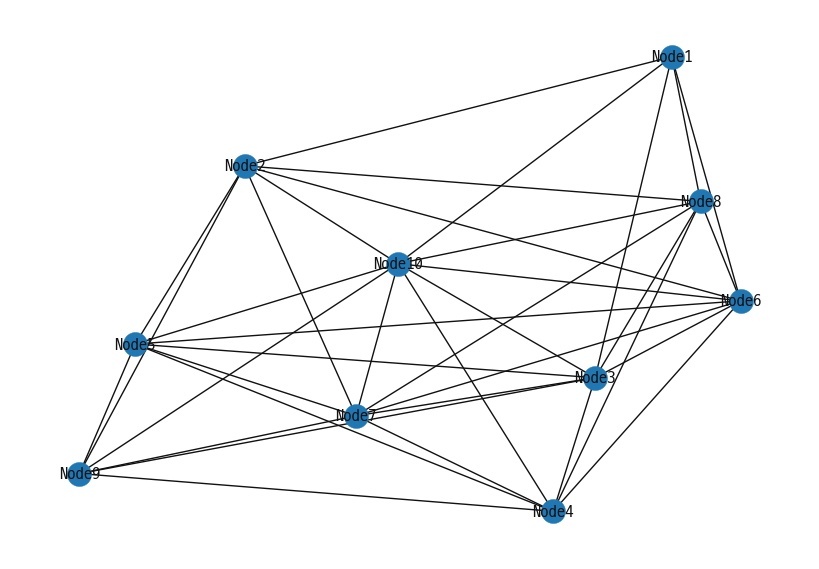

In [47]:
# 그래프 객체 생성
G = nx.Graph()

# 노드 추가
G.add_nodes_from(df_social_network.columns)

# 엣지 추가
for i in range(len(df_social_network.index)):
    for j in range(len(df_social_network.columns)):
        if df_social_network.iloc[i, j] == 1:
            G.add_edge(df_social_network.columns[i], df_social_network.columns[j])

nx.draw(G, with_labels=True, font_family='D2CodingLigature Nerd Font')

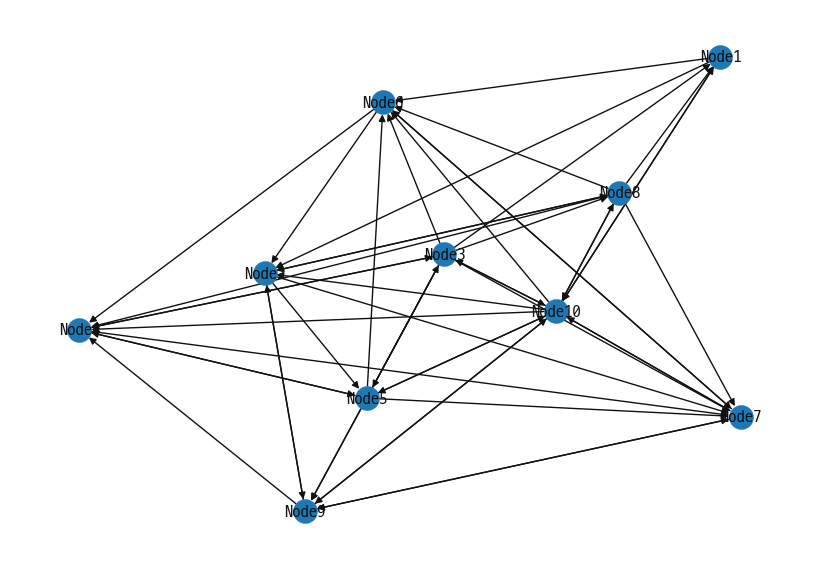

In [53]:
# 그래프 객체 생성
G = nx.DiGraph()

# 노드 추가
G.add_nodes_from(df_social_network.columns)

# 엣지 추가
for i in range(len(df_social_network.index)):
    for j in range(len(df_social_network.columns)):
        if df_social_network.iloc[i, j] == 1:
            G.add_edge(df_social_network.columns[i], df_social_network.columns[j])

nx.draw(G, with_labels=True, font_family='D2CodingLigature Nerd Font')

In [56]:
centrality = nx.degree_centrality(G)    ## 엣지의 갯수로 중요성 판단
print(centrality)

{'Node1': 0.6666666666666666, 'Node2': 1.0, 'Node3': 1.222222222222222, 'Node4': 1.0, 'Node5': 1.1111111111111112, 'Node6': 1.0, 'Node7': 1.222222222222222, 'Node8': 1.0, 'Node9': 1.0, 'Node10': 1.6666666666666665}


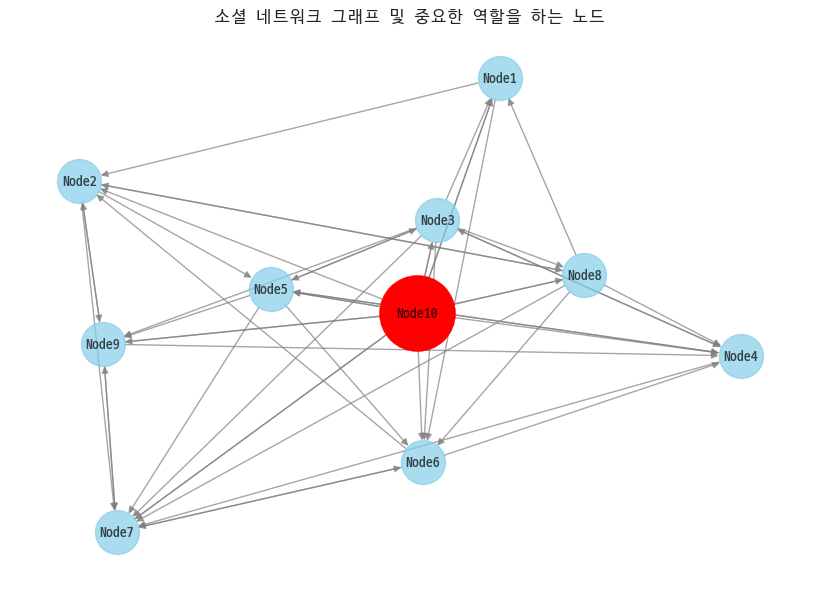

가장 중요한 역할을 하는 노드: Node10


In [ ]:
# 중요도가 높은 노드 찾기
most_important_node = max(centrality, key=centrality.get)

# 시각화
pos = nx.spring_layout(G)   ## 평면에 랜덤으로 노드 배치
nx.draw(G, pos, with_labels=True, font_family='D2CodingLigature Nerd Font', font_weight='bold', node_size=1000,
        font_color='black', font_size=10, node_color='skyblue', edge_color='gray', linewidths=1, alpha=0.7
        )
nx.draw_networkx_nodes(G, pos, nodelist=[most_important_node], node_size=3000, node_color='red')

plt.title("소셜 네트워크 그래프 및 중요한 역할을 하는 노드")
plt.show()

print(f"가장 중요한 역할을 하는 노드: {most_important_node}")

In [62]:
## 두번째로 중요도가 높은 노드
sorted_node = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
print(sorted_node)
second_important_node = sorted_node[1][0]   # 두 번째 노드
print(second_important_node)

[('Node10', 1.6666666666666665), ('Node3', 1.222222222222222), ('Node7', 1.222222222222222), ('Node5', 1.1111111111111112), ('Node2', 1.0), ('Node4', 1.0), ('Node6', 1.0), ('Node8', 1.0), ('Node9', 1.0), ('Node1', 0.6666666666666666)]
Node3


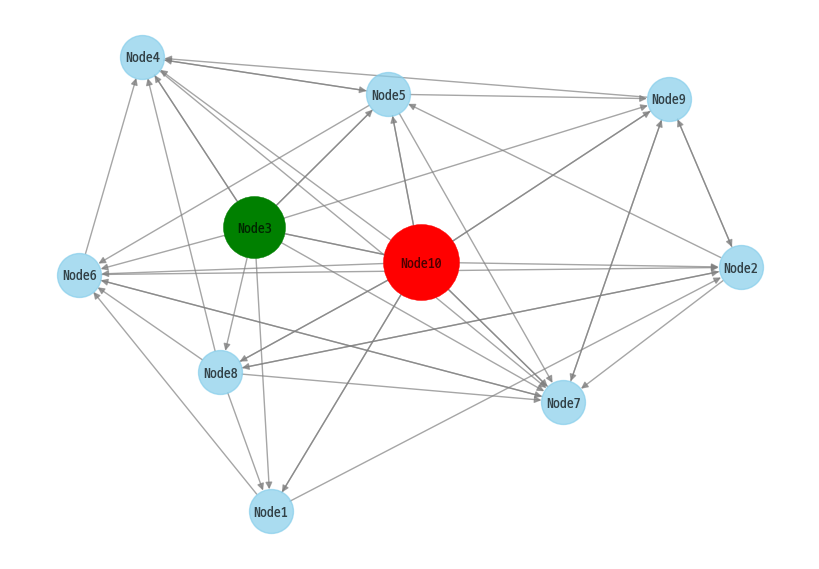

In [68]:
# 시각화
pos = nx.spring_layout(G)   ## 평면에 랜덤으로 노드 배치
nx.draw(G, pos, with_labels=True, font_family='D2CodingLigature Nerd Font', font_weight='bold', node_size=1000,
        font_color='black', font_size=10, node_color='skyblue', edge_color='gray', linewidths=1, alpha=0.7
        )

# 가장 중요한 노드 강조
nx.draw_networkx_nodes(G, pos, nodelist=[most_important_node], node_size=3000, node_color='red')

# 두 번째로 중요한 노드 강조
nx.draw_networkx_nodes(G, pos, nodelist=[second_important_node], node_size=2000, node_color='green')